In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
pd.DataFrame(boston.data, columns=boston.feature_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [2]:
train_data_bs, test_data_bs, train_labels_bs, test_labels_bs = train_test_split(boston.data, boston.target, test_size=0.2)
pd.DataFrame(train_data_bs, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
1,5.44114,0.0,18.10,0.0,0.7130,6.655,98.2,2.3552,24.0,666.0,20.2,355.29,17.73
2,0.02498,0.0,1.89,0.0,0.5180,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65
3,13.52220,0.0,18.10,0.0,0.6310,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
4,0.05497,0.0,5.19,0.0,0.5150,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
5,0.07022,0.0,4.05,0.0,0.5100,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11
6,15.17720,0.0,18.10,0.0,0.7400,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45
7,0.14150,0.0,6.91,0.0,0.4480,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
8,0.22927,0.0,6.91,0.0,0.4480,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
9,0.07165,0.0,25.65,0.0,0.5810,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27


In [3]:
pd.DataFrame(test_data_bs, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,2.24236,0.0,19.58,0.0,0.605,5.854,91.8,2.4220,5.0,403.0,14.7,395.11,11.64
1,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10
2,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28
5,0.25387,0.0,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81
6,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
7,9.33889,0.0,18.10,0.0,0.679,6.380,95.6,1.9682,24.0,666.0,20.2,60.72,24.08
8,0.03150,95.0,1.47,0.0,0.403,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
9,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24


In [4]:
pd.DataFrame(train_labels_bs)

,0
0,30.1
1,19.9
2,23.1
3,8.8
4,7.2
5,23.6
6,23.4
7,23.3
8,16.7
9,43.1


In [4]:
pd.DataFrame(test_labels_bs)

,0
0,22.7
1,21.5
2,13.2
3,23.1
4,14.8
5,14.4
6,20.1
7,9.5
8,34.9
9,19.4


In [6]:
forest = RandomForestRegressor()
forest.fit(train_data_bs, train_labels_bs)

train_labels_pred = forest.predict(train_data_bs)
test_labels_pred = forest.predict(test_data_bs)
pd.DataFrame(train_labels_pred)

,0
0,19.98
1,15.94
2,17.59
3,20.78
4,19.28
5,22.74
6,8.91
7,25.12
8,18.17
9,22.09


In [7]:
pd.DataFrame(test_labels_pred)

,0
0,20.12
1,20.07
2,18.51
3,24.55
4,15.71
5,17.95
6,20.69
7,11.02
8,33.79
9,19.90


In [8]:
forest.score(test_data_bs, test_labels_bs)

0.8886210637431347

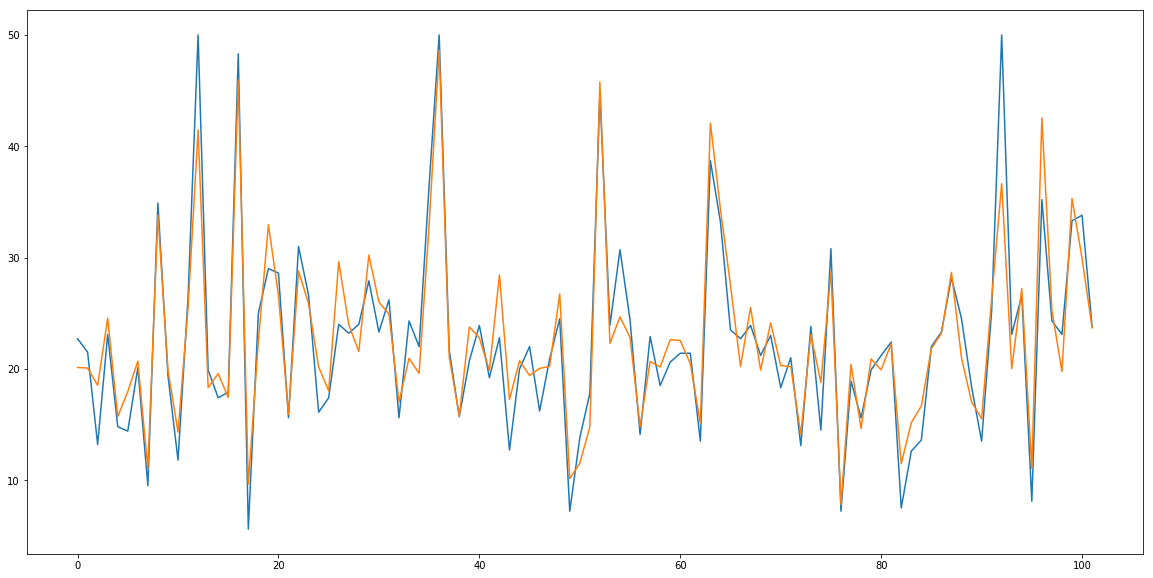

In [9]:
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(test_labels_pred, label="predicted")


In [ ]:
from sklearn.grid_search import GridSearchCV
params = {'n_estimators'  : [3, 10, 100, 1000, 10000], 'n_jobs': [-1]}
cv = GridSearchCV(
    RandomForestRegressor(),
    params,
    cv = 10,
    scoring= 'mean_squared_error',
    n_jobs = -1,
    verbose=True
)
cv.fit(train_data_bs, train_labels_bs)
print(cv.best_estimator_)

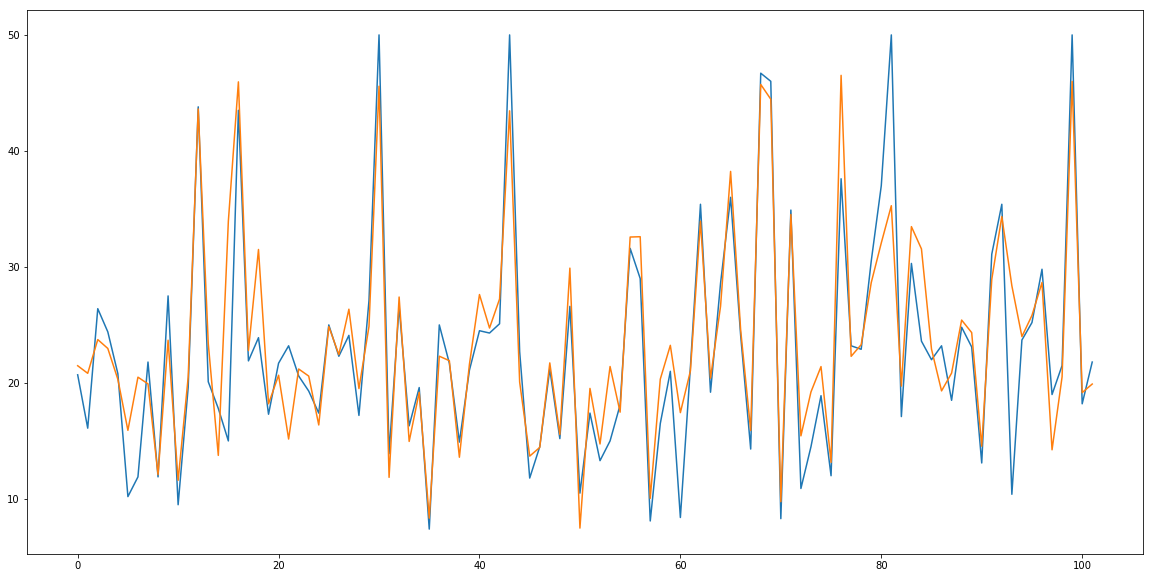

In [11]:
train_labels_pred = cv.best_estimator_.predict(train_data_bs)
test_labels_pred = cv.best_estimator_.predict(test_data_bs)
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(test_labels_pred, label="predicted")